In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from wordcloud import WordCloud

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.cluster import KMeans,BisectingKMeans

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
from scipy.stats import skew

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS

#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
#hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
!pip install scikit-plot

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
from sklearn.naive_bayes import GaussianNB, CategoricalNB


# Create a label encoder
label_encoder = LabelEncoder()

from yellowbrick.cluster import KElbowVisualizer

In [2]:
cleaned_df = pd.read_csv('./DataUnderstanding.csv')

In [3]:
cleaned_df.head()

,name,duration_min,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,4.029333,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.302000,0.536000,0.281,0.635,142.221,4.0,567.0,141.0,1.279305,j-dance
1,Ondskapens Galakse,5.558433,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.000089,0.800000,0.262,0.489,116.628,4.0,652.0,162.0,3.700483,black-metal
2,Can't Look Away,4.496667,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.066400,0.001270,0.117,0.385,140.880,4.0,619.0,155.0,1.279305,bluegrass
3,Thunderground,5.127517,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.000576,0.096900,0.299,0.637,143.956,4.0,733.0,183.0,4.067086,happy
4,Sick Bubblegum,3.737767,True,32,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.642,0.972,5,-3.047,...,0.001520,0.000024,0.384,0.421,118.035,4.0,432.0,106.0,1.279305,industrial


In [4]:
y = np.array(cleaned_df["genre"])

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming 'genre' is your target variable and it's categorical
label_encoder = LabelEncoder()

cleaned_df['genre_encoded'] = label_encoder.fit_transform(cleaned_df['genre'])

y = cleaned_df['genre_encoded']

cleaned_df.drop(columns=['name', 'artists', 'album_name','genre','genre_encoded'], inplace=True)
#cleaned_df.drop(columns=['genre'], inplace=True)


# Load and preprocess your dataset
scaler = MinMaxScaler()
# Scale the numerical columns and update in dataframe
cleaned_df = scaler.fit_transform(cleaned_df)



In [6]:


# Splitting the dataset into features and target variable
X = cleaned_df


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3875862068965517

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.21      0.24       128
           1       0.62      0.66      0.64       117
           2       0.47      0.41      0.44       151
           3       0.24      0.23      0.24        94
           4       0.30      0.32      0.31       107
           5       0.47      0.47      0.47       116
           6       0.42      0.43      0.43       107
           7       0.52      0.55      0.53       115
           8       0.34      0.43      0.38        89
           9       0.27      0.29      0.28       102
          10       0.23      0.24      0.23       114
          11       0.36      0.34      0.35       129
          12       0.43      0.48      0.45        66
          13       0.10      0.10      0.10        60
          14       0.47      0.41      0.44       139
          15       0.36      0.39      0.38       158
          16       0.27    

In [7]:

cleaned_df.shape


(10873, 18)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load your cleaned dataset
cleaned_df = pd.read_csv('./DataUnderstanding.csv')

# Encode the 'genre' column
label_encoder = LabelEncoder()
cleaned_df['genre_encoded'] = label_encoder.fit_transform(cleaned_df['genre'])

# Define the target variable (y) and features (X)
y = cleaned_df['genre_encoded']
X = cleaned_df.drop(columns=['name', 'artists', 'album_name', 'genre', 'genre_encoded'])

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3875862068965517

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.21      0.24       128
           1       0.62      0.66      0.64       117
           2       0.47      0.41      0.44       151
           3       0.24      0.23      0.24        94
           4       0.30      0.32      0.31       107
           5       0.47      0.47      0.47       116
           6       0.42      0.43      0.43       107
           7       0.52      0.55      0.53       115
           8       0.34      0.43      0.38        89
           9       0.27      0.29      0.28       102
          10       0.23      0.24      0.23       114
          11       0.36      0.34      0.35       129
          12       0.43      0.48      0.45        66
          13       0.10      0.10      0.10        60
          14       0.47      0.41      0.44       139
          15       0.36      0.39      0.38       158
          16       0.27    

# DECISION TREE NEW

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import scikitplot as skplt

# Load your cleaned dataset
cleaned_df = pd.read_csv('./DataUnderstanding.csv')

# Encode the 'genre' column
label_encoder = LabelEncoder()
cleaned_df['genre_encoded'] = label_encoder.fit_transform(cleaned_df['genre'])

# Define the target variable (y) and features (X)
y = cleaned_df['genre_encoded']
X = cleaned_df.drop(columns=['name', 'artists', 'album_name', 'genre', 'genre_encoded'])

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3875862068965517
F1 Score: 0.3863391559588124
Precision: 0.3875729256622489
Recall: 0.3875862068965517

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.21      0.24       128
           1       0.62      0.66      0.64       117
           2       0.47      0.41      0.44       151
           3       0.24      0.23      0.24        94
           4       0.30      0.32      0.31       107
           5       0.47      0.47      0.47       116
           6       0.42      0.43      0.43       107
           7       0.52      0.55      0.53       115
           8       0.34      0.43      0.38        89
           9       0.27      0.29      0.28       102
          10       0.23      0.24      0.23       114
          11       0.36      0.34      0.35       129
          12       0.43      0.48      0.45        66
          13       0.10      0.10      0.10        60
          14       0.47      0.41      0.44      

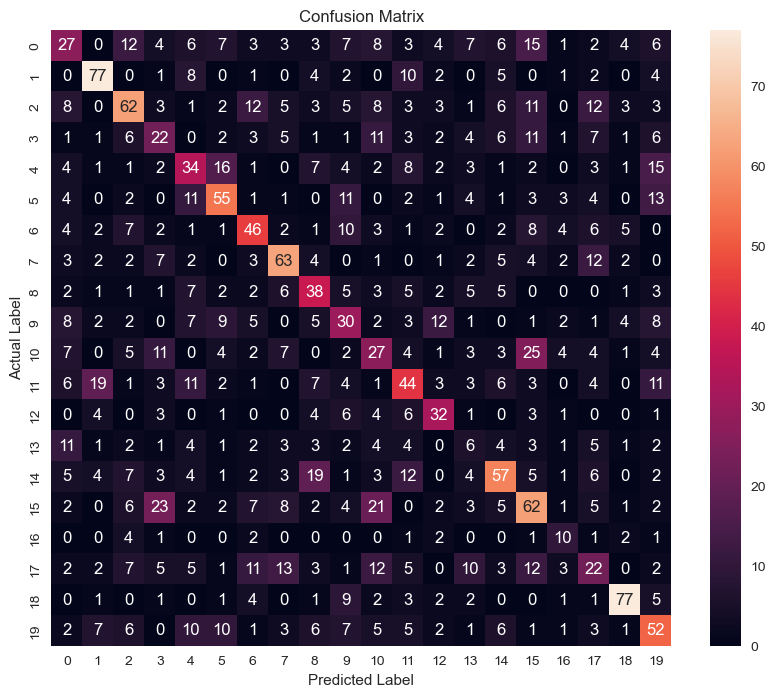

In [15]:

# Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()




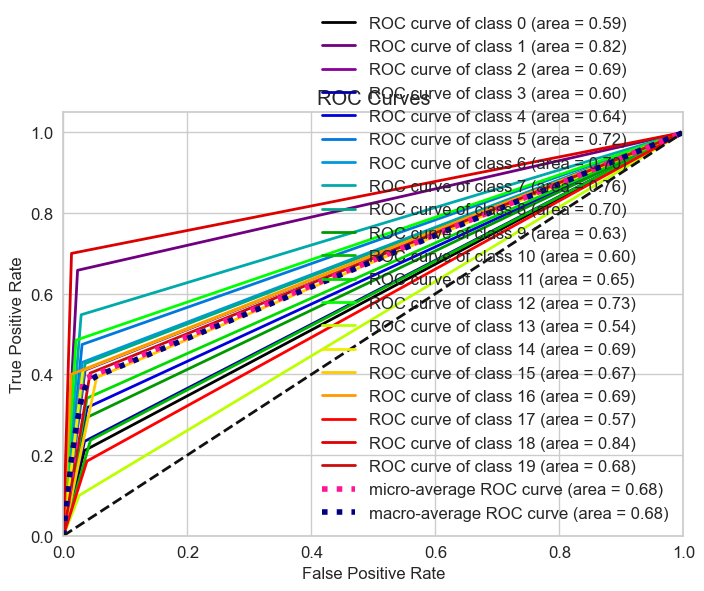

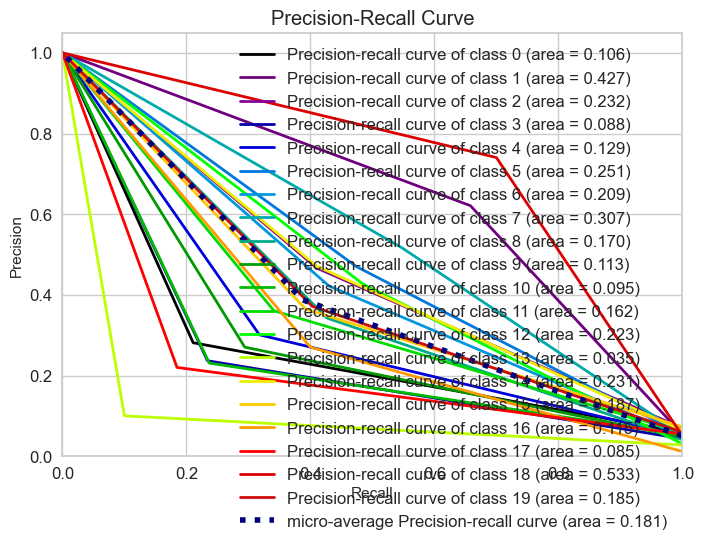

In [16]:
# ROC and Precision-Recall Curves
y_probas = clf.predict_proba(X_test)  # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

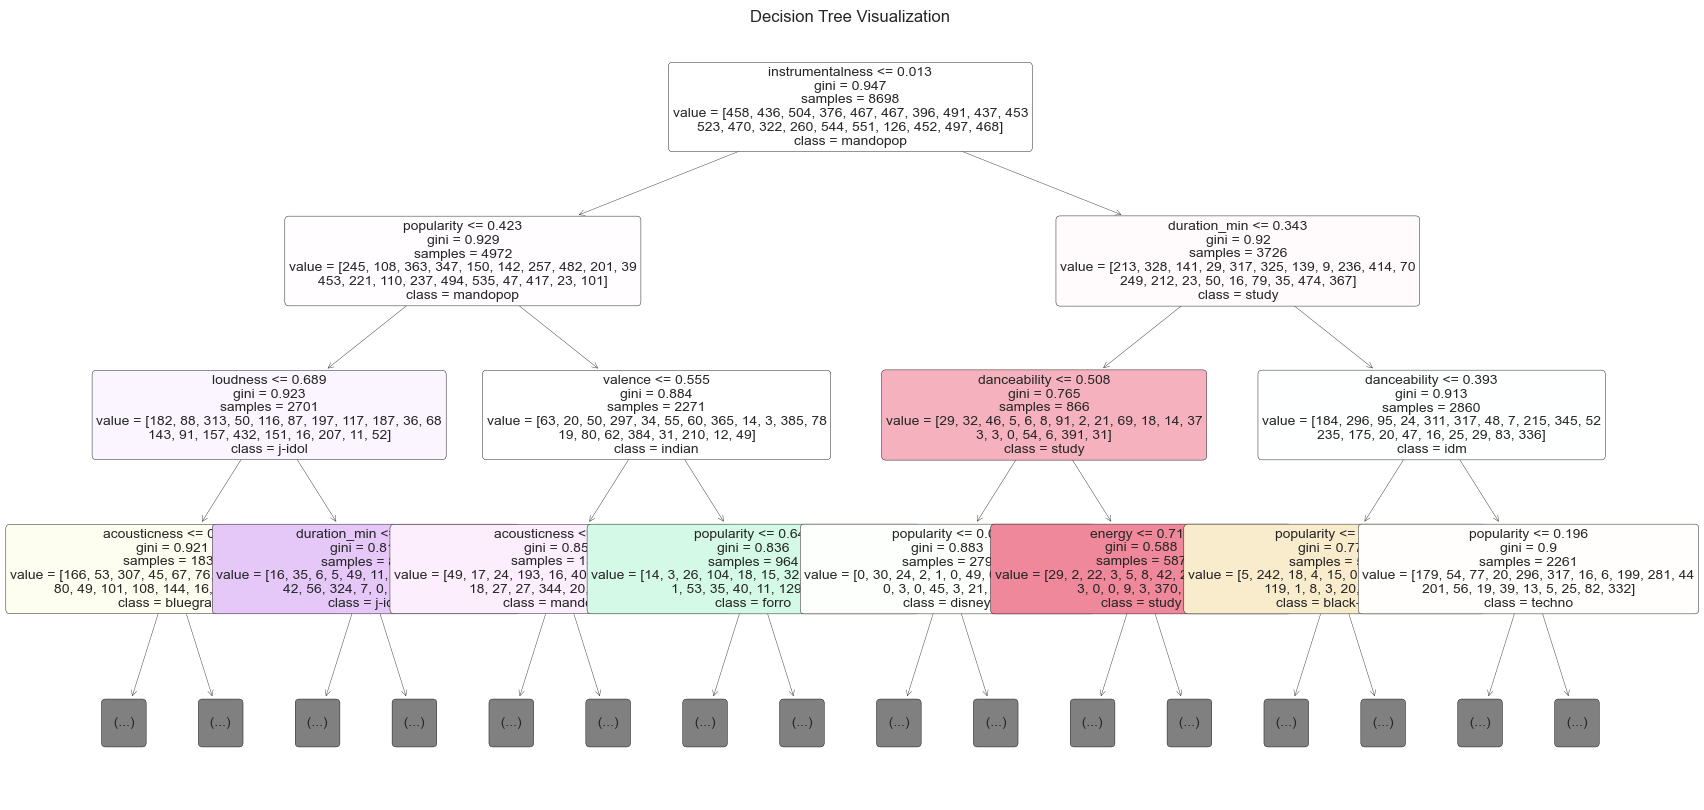

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert class names to a list
class_names_list = label_encoder.classes_.tolist()

# Convert feature names to a list
feature_names_list = X.columns.tolist()

plt.figure(figsize=(20,10))
plot_tree(clf, 
          filled=True, 
          rounded=True, 
          class_names=class_names_list, 
          feature_names=feature_names_list, 
          max_depth=3,  # Adjust max_depth as needed
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


# KNN

Best k: 11 with Accuracy: 0.3876


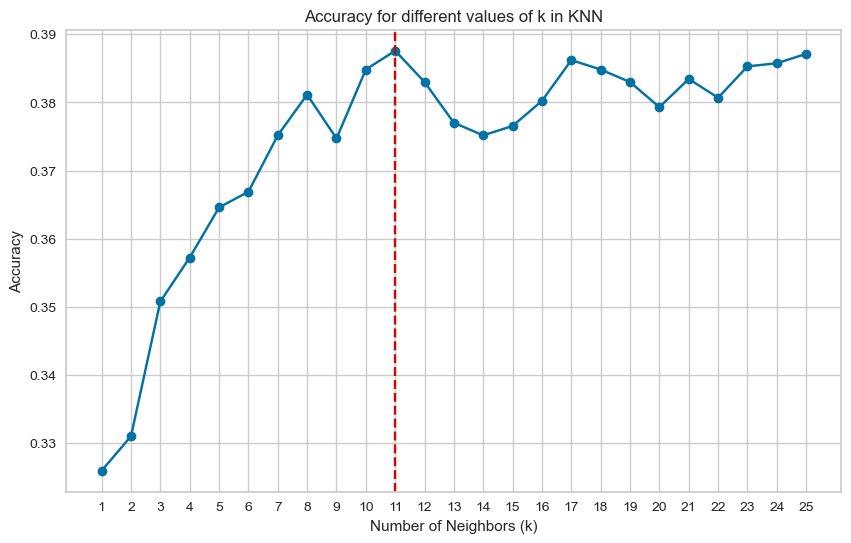

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of k to try
k_range = range(1, 26)

# Dictionary to store scores
k_scores = {}

# Loop over values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_scores[k] = accuracy

# Find the best k (key) based on the highest accuracy (value)
best_k = max(k_scores, key=k_scores.get)
best_accuracy = k_scores[best_k]

print(f"Best k: {best_k} with Accuracy: {best_accuracy:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, list(k_scores.values()), marker='o', linestyle='-', color='b')
plt.title('Accuracy for different values of k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.axvline(x=best_k, color='r', linestyle='--')
plt.show()


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the classifier
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.3875862068965517

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.27      0.26       128
           1       0.46      0.64      0.54       117
           2       0.41      0.59      0.49       151
           3       0.15      0.13      0.14        94
           4       0.22      0.19      0.20       107
           5       0.41      0.45      0.43       116
           6       0.36      0.28      0.31       107
           7       0.54      0.63      0.58       115
           8       0.30      0.33      0.31        89
           9       0.41      0.29      0.34       102
          10       0.33      0.28      0.30       114
          11       0.25      0.20      0.23       129
          12       0.34      0.15      0.21        66
          13       0.17      0.12      0.14        60
          14       0.39      0.54      0.46       139
          15       0.38      0.56      0.45       158
          16       

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and print classification metrics
print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)



KNN Classification Report:

              precision    recall  f1-score   support

           0       0.26      0.27      0.26       128
           1       0.46      0.64      0.54       117
           2       0.41      0.59      0.49       151
           3       0.15      0.13      0.14        94
           4       0.22      0.19      0.20       107
           5       0.41      0.45      0.43       116
           6       0.36      0.28      0.31       107
           7       0.54      0.63      0.58       115
           8       0.30      0.33      0.31        89
           9       0.41      0.29      0.34       102
          10       0.33      0.28      0.30       114
          11       0.25      0.20      0.23       129
          12       0.34      0.15      0.21        66
          13       0.17      0.12      0.14        60
          14       0.39      0.54      0.46       139
          15       0.38      0.56      0.45       158
          16       0.45      0.20      0.28        25

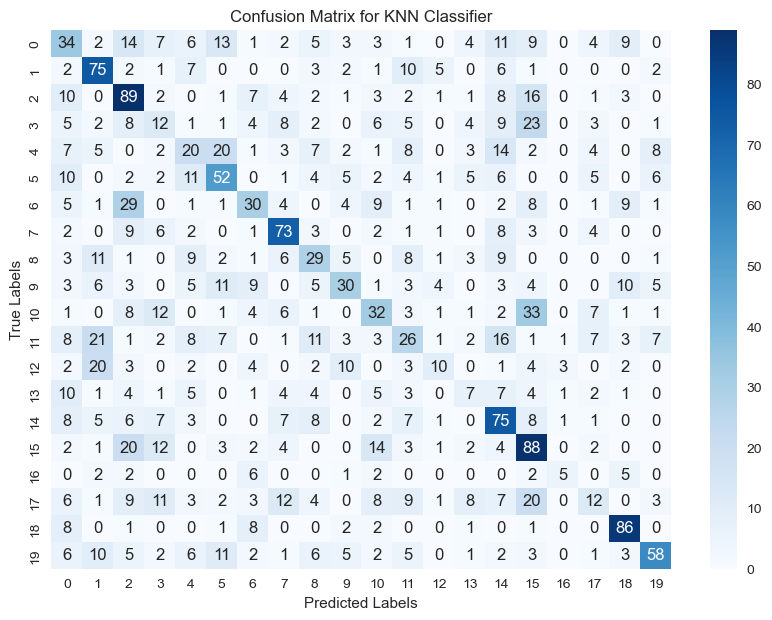

In [29]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


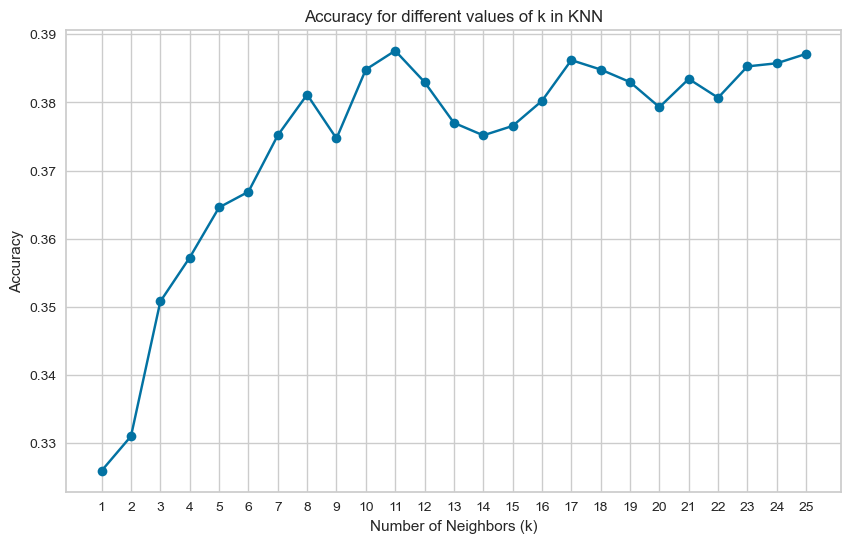

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Range of k to try
k_range = range(1, 26)

# Empty list to store scores
scores = []

# Loop over values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy for different values of k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()


# best k for KNN

# Naive Bayes classification

In [ ]:
# For label encoding
from sklearn.preprocessing import LabelEncoder

# Assuming 'cleaned_df' is your DataFrame
label_encoder = LabelEncoder()

# Encode each non-numeric column
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'object':
        cleaned_df[column] = label_encoder.fit_transform(cleaned_df[column])

# Now all columns are numeric, and you can apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(cleaned_df)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
cleaned_df = pd.read_csv('./DataUnderstanding.csv')

# Identify non-numeric columns
non_numeric_columns = cleaned_df.select_dtypes(include=['object']).columns

# Convert non-numeric columns to numeric
# Here I'm using Label Encoding as an example. You might need a different approach.
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])

# Define features and target variable
X = cleaned_df.drop('genre', axis=1)  # Assuming 'genre' is the target variable
y = cleaned_df['genre']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict and evaluate the classifier
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
cleaned_df = pd.read_csv('./DataUnderstanding.csv')

# Convert non-numeric columns to numeric (assuming non-numeric columns are categorical)
label_encoder = LabelEncoder()
for col in cleaned_df.select_dtypes(include=['object']).columns:
    cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])

# Define features and target variable
X = cleaned_df.drop('genre', axis=1)  # Assuming 'genre' is the target variable
y = cleaned_df['genre']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)
y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes').plot()
plt.title('ROC Curve')
plt.show()


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_encoder.fit_transform(cleaned_df['genre'])
y_binarized = label_binarize(y, classes=np.unique(y))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train_binarized, y_test_binarized = train_test_split(X_scaled, y_binarized, test_size=0.2, random_state=42)

# Train the Naive Bayes Classifier
nb_classifier.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = nb_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for a specific class or micro-average
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred = clf.predict(X_test)